In [3]:
import sys
sys.path.insert(0,'/home/jhon/Imagens/patankar-euler')

from numerical_calculations import *

import numpy as np
import matplotlib.pyplot as plt

In [4]:
def lotka_volterra(z, a1, b1, a2, b2):
    x1, x2 = z
    dx1dt = a1 * x1 - b1 * x1 * x2
    dx2dt = a2 * x2 * b2 - x1 * x2
    return np.array([dxdt, dydt])

In [194]:
a1,a2,b1,b2 = 0.1 , -0.1, 0.1, -0.12
sigma1, sigma2 = 0.2 , 0.2

def f(t, x):
    x = np.array([b1,b2])*x
    return x

def d(t,x):
    x = np.array([a1, a2])*x[::-1]*x
    return x

def g(t,x):
    x = np.array([sigma1, sigma2])*x
    return x

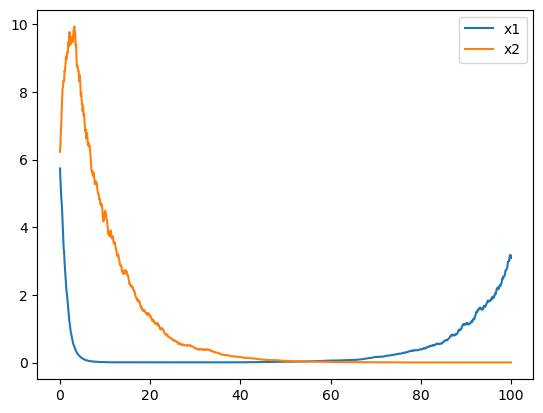

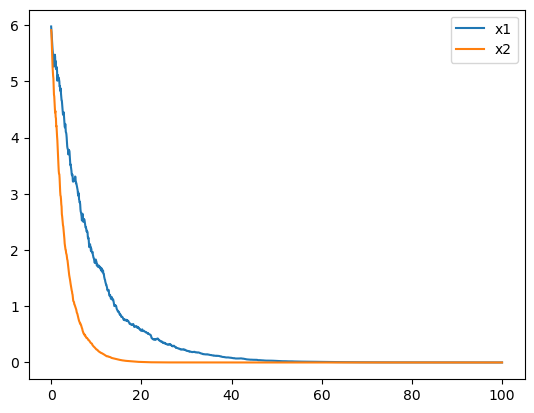

In [197]:
### This cell was only to verify when my sigma was giving errors
h = 1/(2**4) 
sigma1 = 0.2 
sigma2 = 0.2 
initial = 0 
end = 100

times = np.linspace(initial,end, (end - initial)*(int(1/h)))
initial_condition = [6 , 6]

cem = composite_euler_method([f], [d], [g], times, h , initial_condition)
fcem = fully_composite_euler_method([f], [d], [g], times, h , initial_condition)
h = 2**4

plt.plot(times, fcem[:, 0], label = 'x1')
plt.plot(times, fcem[:, 1], label = 'x2')
plt.legend()
plt.show()

plt.plot(times, cem[:, 0], label = 'x1')
plt.plot(times, cem[:, 1], label = 'x2')
plt.legend()
plt.show()


In [209]:
def simulation_cem_fcem(h = 1/(2**4), sigma1 = 0.2, sigma2 = 0.2, initial = 0, end = 100):

    times = np.linspace(initial,end, (end-initial)*(int(1/h)))
    initial_condition = [10 , 10]

    g = lambda t, x: np.array([sigma1, sigma2]) * x

    cem = composite_euler_method([f], [d], [g], times, h, initial_condition)
    fcem = fully_composite_euler_method([f], [d], [g],  times,h, initial_condition)

    return cem , fcem


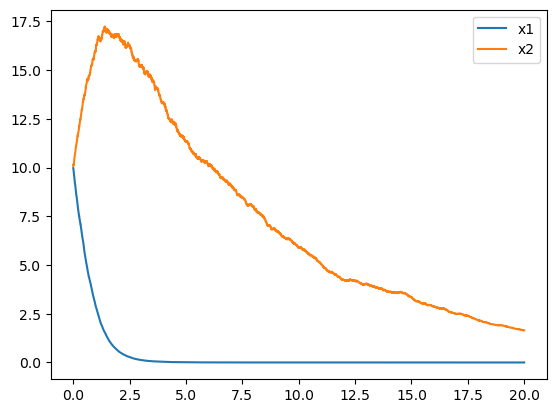

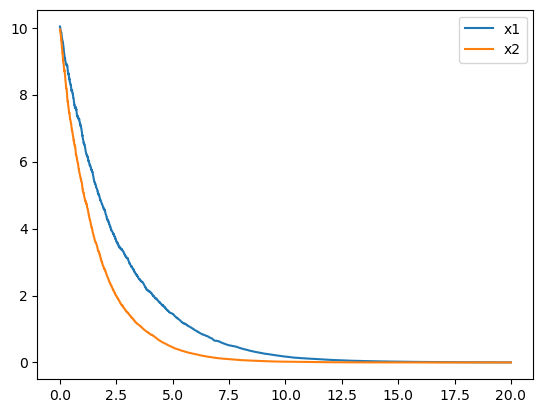

In [211]:
cem, fcem = simulation_cem_fcem(h = 1/(2**8), sigma1= 0.5, sigma2= 0.5, end = 20)
fcem

times = np.linspace(0,20, 20*(2**8))
plt.plot(times, fcem[:, 0], label = 'x1')
plt.plot(times, fcem[:, 1], label = 'x2')
plt.legend()
plt.show()

plt.plot(times, cem[:, 0], label = 'x1')
plt.plot(times, cem[:, 1], label = 'x2')
plt.legend()
plt.show()


In [98]:
counting_simulations = 0
step_value = 0
step_numbers = []


for i in range(100):
    cem, fcem = simulation_cem_fcem(sigma1 = 0.2 , sigma2 = 0.2)

    for j in range(len(fcem)):
        if np.any(fcem[j] < 0):
            counting_simulations += 1
            step_value += len(fcem[j][fcem[j] < 0])
        step_numbers.append(step_value)

print(counting_simulations)
print(np.mean(step_numbers))


0
0.0


## Verifying the "pure" simulations to find problems

In [ ]:
## First of all, testing to see if the explict euler method delivers a viable solution

times = np.linspace(0,20, 100*(2**4))

ee = explicit_euler([f], [d], times, [6, 6])

plt.plot(times, ee[0], label = 'x1')
plt.plot(times, ee[1], label = 'x2')
plt.legend()
plt.show()

In [ ]:
# Now, veryfing the euler maruyama method
# Note that this method gives us None values for some calculations
# the error shows up between the 100° value and the 200°
times = np.linspace(0,10, 100*(2**4))

em = euler_maruyama([f], [d], [g], times, [6, 6])

plt.plot(times[0:200], em[0][0:200], label = 'x1')
plt.plot(times[0:200], em[1][0:200], label = 'x2')
plt.legend()
plt.show()

print(em[0][0:10])


In [ ]:
# Here we can verify the solution utilizing the deterministic patankar
# euler method until the 50° value. 
imes = np.linspace(0,20, 100*(2**4))

dpe = deterministic_patankar_euler([f], [d], [g], times, [6, 6])

plt.plot(times[0:50], dpe[0][0:50], label = 'x1')
plt.plot(times[0:50], dpe[1][0:50], label = 'x2')
plt.legend()
plt.show()

In [ ]:
# I verifyied if there's some error doing the complete calculation
# to the deterministc patankar euler method, but didn't find it.
# With this graph I could verify the convergence of the method.

times = np.linspace(0,100, 100*(2**4))
h = 1/(2**4)
dpe = deterministic_patankar_euler([f], [d], [g], times, h, [6, 6])

plt.plot(times, dpe[0], label = 'x1')
plt.plot(times, dpe[1], label = 'x2')
plt.legend()
plt.show()

In [ ]:
# This method showed the more satisfiying result with the values
# on the initial condition.

times = np.linspace(0,100, 100*(2**4))
h = 1/(2**4)
spe = stochastic_patankar_euler([f], [d], [g], times, h, [6, 6])

plt.plot(times, spe[0], label = 'x1')
plt.plot(times, spe[1], label = 'x2')
plt.legend()
plt.show()

### Verifying the simulations of terms to find problems

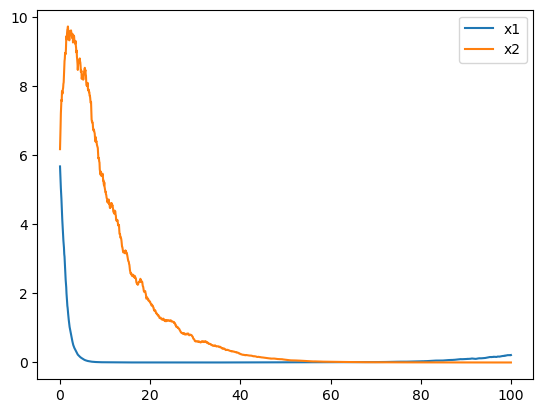

In [21]:
times = np.linspace(0,100, 100*(2**4))

h = 1/(2**4)
emethod = euler_method([f], [d], [g], times, h, [6, 6])

plt.plot(times, emethod[:,0], label = 'x1')
plt.plot(times, emethod[:,1], label = 'x2')
plt.legend()
plt.show()


## I found the error!!!!!!!!!!!!!!!!!!!!!!!!
## the error was in the code...

# First table of the article, using explicit euler 

In [22]:
def simulation_ee(h = 1/(2**4), sigma1 = 0.2, sigma2 = 0.2, initial = 0, end = 100):

    times = np.linspace(initial,end, (int(1/h)))
    initial_condition = [6 , 6]

    g = lambda t, x: np.array([sigma1, sigma2]) * x

    emethod = euler_method([f], [d], [g], times, h ,initial_condition)

    return emethod

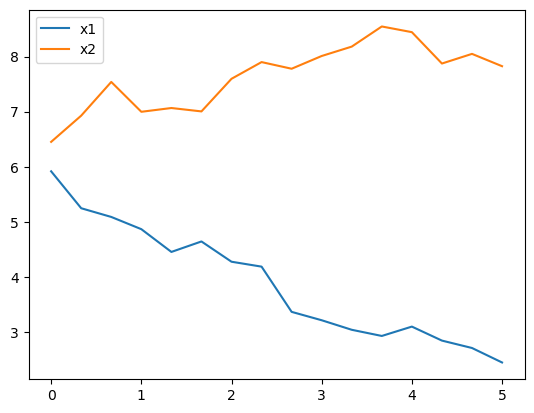

In [86]:
times = np.linspace(0, 5, (2**4))

emethod = simulation_ee(sigma1 = 0.8, sigma2 = 0.8)

plt.plot(times, emethod[:,0], label = 'x1' )
plt.plot(times, emethod[:,1], label = 'x2' )
plt.legend()
plt.show()


In [88]:
## Simulation using explicit euler method (euler-maruyama actually)
## I'm finding problems with the solutions because they are or not
## giving any negative solution or giving all negative solutions
counting_simulations = 0
step_value = 0
step_numbers = []


for i in range(1000):
    ee = simulation_ee(sigma1 = 0.4 , sigma2 = 0.4)

    for j in range(len(ee)):
        if np.any(ee[j] < 0):
            counting_simulations += 1
            step_value += len(ee[j][ee[j] < 0])
        step_numbers.append(step_value)

print(counting_simulations)
print(np.mean(step_numbers))

0
0.0


Changing plans, using the fully composite euler method to verify

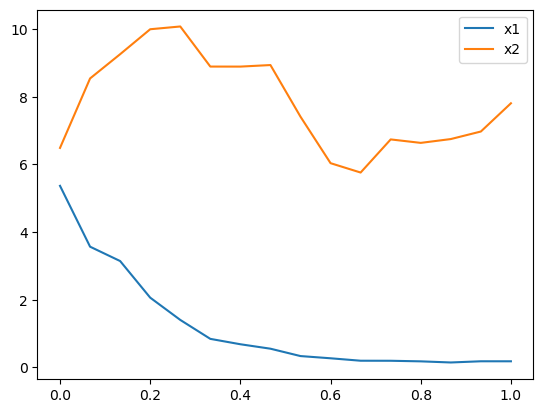

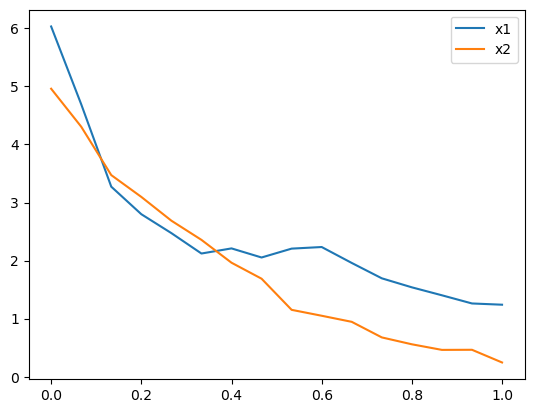

In [84]:
def simulation_cem_fcem(h = 1/(2**4), sigma1 = 0.2, sigma2 = 0.2, initial = 0, end = 100):

    times = np.linspace(initial,end, int(1/h))
    initial_condition = [6 , 6]

    g = lambda t, x: np.array([sigma1, sigma2]) * x

    cem = composite_euler_method([f], [d], [g], times,h, initial_condition)
    fcem = fully_composite_euler_method([f], [d], [g], times,h, initial_condition)

    return cem , fcem


cem, fcem = simulation_cem_fcem(h = 1/(2**4), sigma1= 0.4, sigma2= 0.4)
fcem

times = np.linspace(0,1, (2**4))
plt.plot(times, fcem[:, 0], label = 'x1')
plt.plot(times, fcem[:, 1], label = 'x2')
plt.legend()
plt.show()

plt.plot(times, cem[:, 0], label = 'x1')
plt.plot(times, cem[:, 1], label = 'x2')
plt.legend()
plt.show()


In [100]:
counting_simulations = 0
step_value = 0
step_numbers = []


for i in range(1000):
    cem, fcem = simulation_cem_fcem(sigma1 = 0.4 , sigma2 = 0.4)

    for j in range(len(fcem)):
        if np.any(fcem[j] < 0):
            counting_simulations += 1
            step_value += len(fcem[j][fcem[j] < 0])
        step_numbers.append(step_value)

print(counting_simulations)
print(np.mean(step_numbers))


0
0.0


In [99]:
counting_simulations = 0
step_number1 = []
step_numbers = []


for i in range(1000):
    cem, fcem = simulation_cem_fcem(h = 1/(2**4),sigma1 = 0.8 , sigma2 = 0.8)

    for j in range(len(fcem)):
        if np.any(fcem[j] < 0):
            counting_simulations += 1
            step_number1.append(1)
        if step_number1:    
            step_numbers.append( np.sum(step_number1))


print(counting_simulations)
print(np.mean(step_numbers))


0
nan


/home/jhon/miniconda3/envs/numerical/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jhon/miniconda3/envs/numerical/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
